1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

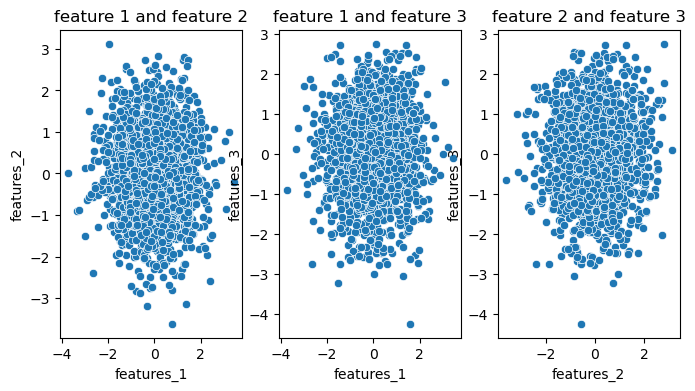

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
file_name = "./regression_generated.csv"
df = pd.read_csv(file_name)

fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 4))
sns.scatterplot(x=df['features_1'],y=df['features_2'],ax=ax1)
ax1.set(title='feature 1 and feature 2')
sns.scatterplot(x=df['features_1'],y=df['features_3'],ax=ax2)
ax2.set(title='feature 1 and feature 3')
sns.scatterplot(x=df['features_2'],y=df['features_3'],ax=ax3)
ax3.set(title='feature 2 and feature 3')
selected_features = ['features_1', 'features_2', 'features_3']
#Scatter plots strongly suggests a positive correlation among the features_1,features_2 and features_3. 


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

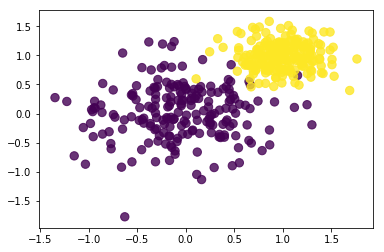

In [2]:
from IPython.display import Image
import numpy as np
Image('images/two_categories_scatter_plot.png')



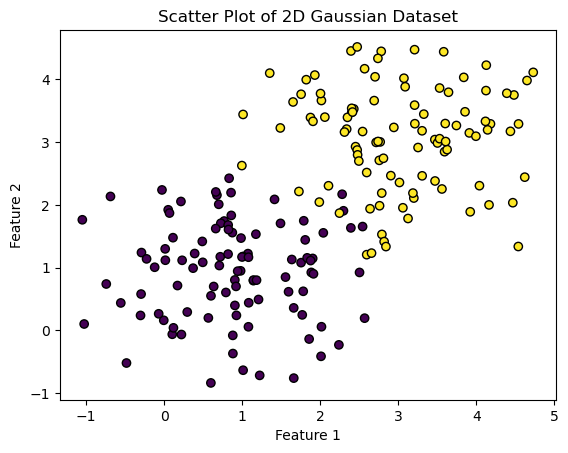

In [3]:

import numpy as np
import matplotlib.pyplot as plt

def generate_2d_gaussian_dataset(mean1, std1, mean2, std2, num_samples=100):
    # samples generation for category 1
    category1 = np.random.multivariate_normal(mean1, std1 * np.eye(2), num_samples)

    # samples generation for category 2
    category2 = np.random.multivariate_normal(mean2, std2 * np.eye(2), num_samples)

    # Combining the two categories
    dataset = np.concatenate([category1, category2])

    # Creating labels for the categories (0 for category 1, 1 for category 2)
    labels = np.concatenate([np.zeros(num_samples), np.ones(num_samples)])

    return dataset, labels

def plot_scatter(dataset, labels):
    plt.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap='viridis', edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Scatter Plot of 2D Gaussian Dataset')
    plt.show()

# Example usage:
mean1 = [1, 1]
std1 = 0.5
mean2 = [3, 3]
std2 = 0.7

dataset, labels = generate_2d_gaussian_dataset(mean1, std1, mean2, std2)
plot_scatter(dataset, labels)


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

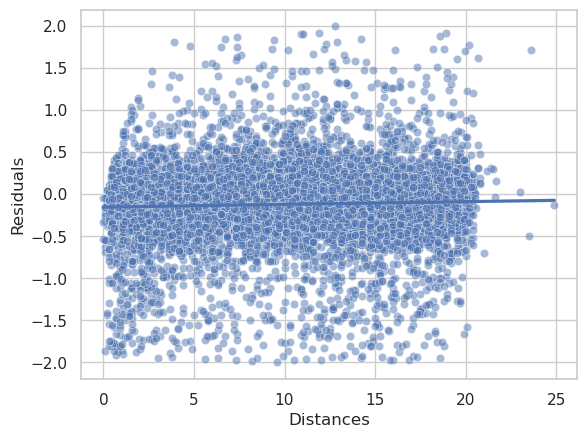

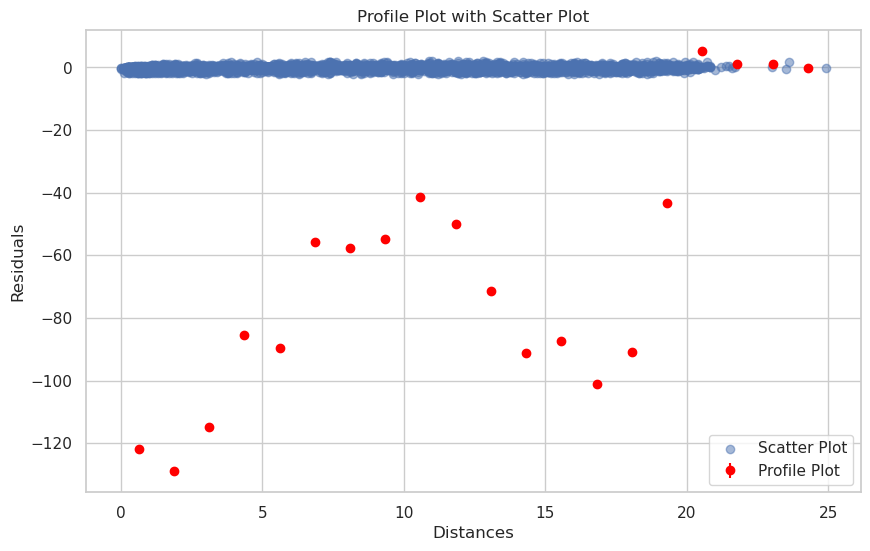

In [4]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading the pickle file
with open('./data/residuals_261.pkl', 'rb') as f:
    data = pickle.load(f)

# Checking if data is a dictionary within a NumPy array
if isinstance(data, np.ndarray) and isinstance(data.item(), dict):
    data_dict = data.item()
else:
    data_dict = data

# Creating a DataFrame
df = pd.DataFrame(data_dict, columns=['residuals', 'distances'])

# Cleaning the sample
df_cleaned = df[abs(df['residuals']) < 2]

# Plotting Seaborn jointplot
sns.set(style="whitegrid")
scatter_plot = sns.scatterplot(x='distances', y='residuals', data=df_cleaned, alpha=0.5)

# Adding regression line to the scatter plot
sns.regplot(x='distances', y='residuals', data=df_cleaned, scatter=False, ax=scatter_plot)

plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.show()


# Manually creating profile histogram
num_bins = 20
bin_edges = np.linspace(df_cleaned['distances'].min(), df_cleaned['distances'].max(), num_bins + 1)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Computing mean and standard deviation in each bin
y_means, _ = np.histogram(df_cleaned['distances'], bins=bin_edges, weights=df_cleaned['residuals'])
y_counts, _ = np.histogram(df_cleaned['distances'], bins=bin_edges)
y_stds = np.zeros_like(y_means)
nonzero_mask = y_counts > 0
y_stds[nonzero_mask] = np.sqrt(np.divide(y_stds[nonzero_mask], y_counts[nonzero_mask]))

# Plotting the profile plot on top of the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df_cleaned['distances'], df_cleaned['residuals'], alpha=0.5, label='Scatter Plot')

# Profile plot
plt.errorbar(x=bin_centers, y=y_means, yerr=y_stds, fmt='o', color='red', label='Profile Plot')

# Set labels and title
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.title('Profile Plot with Scatter Plot')
plt.legend()
plt.show()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


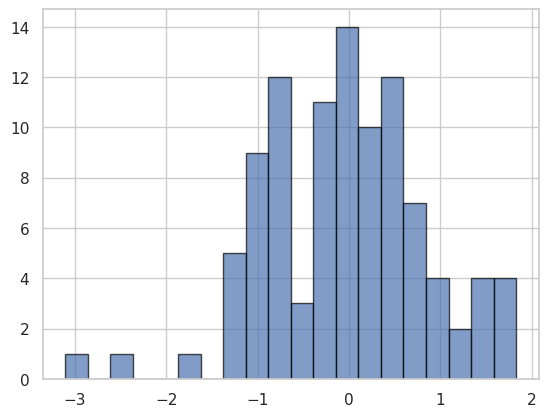

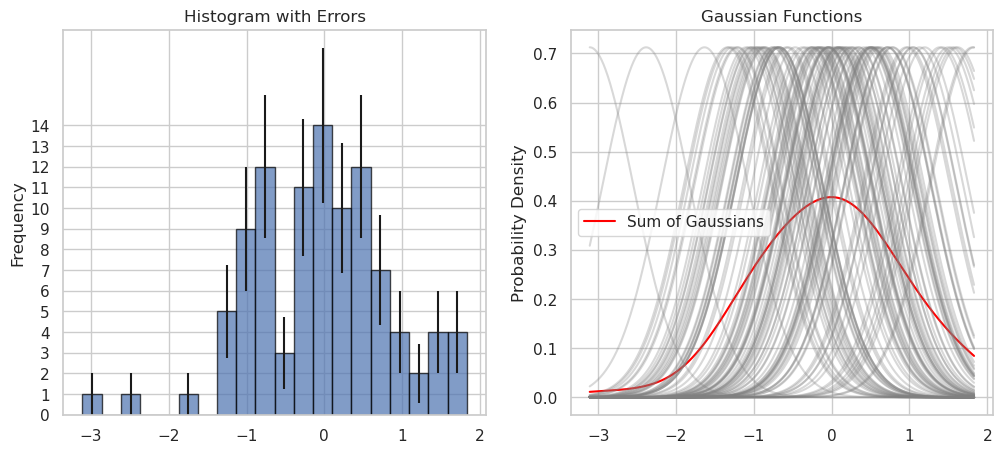

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz

# Step 1: Generating Data
N = 100
mean = 0  # Desired mean
std_dev = 1  # Desired standard deviation

x = np.random.normal(mean, std_dev, N)

# Step 2: Creating Histogram with Errors
hist, edges, _ = plt.hist(x, bins=20, edgecolor='black', alpha=0.7, label='Histogram')

# Calculating bin centers
bin_centers = 0.5 * (edges[:-1] + edges[1:])

# Calculating Poisson uncertainty as errors
errors = np.sqrt(hist)

# Creating Gaussian Functions
std_dev_param = 1.6 * x.std() * N**(-1/5)

# Summing Gaussian Functions and Normalizing
sum_gaussian = np.sum([norm.pdf(np.linspace(min(x), max(x), 1000), loc=val, scale=std_dev_param) for val in x], axis=0)
sum_gaussian /= trapz(sum_gaussian, np.linspace(min(x), max(x), 1000))

# Creating subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plotting Histogram with Errors
ax1.bar(bin_centers, hist, yerr=errors, width=np.diff(edges), edgecolor='black', alpha=0.7, label='Histogram')
ax1.set_ylabel('Frequency')
ax1.set_yticks(np.arange(0, max(hist) + 1, step=1))
ax1.set_title('Histogram with Errors')

# Plotting Gaussian Functions and Sum
ax2.plot(np.linspace(min(x), max(x), 1000), sum_gaussian, color='red', label='Sum of Gaussians')

for val in x:
    gaussian = norm.pdf(np.linspace(min(x), max(x), 1000), loc=val, scale=std_dev_param)
    ax2.plot(np.linspace(min(x), max(x), 1000), gaussian, color='gray', alpha=0.3)

ax2.set_ylabel('Probability Density')
ax2.set_title('Gaussian Functions')

# Showing the plot
plt.legend()
plt.show()
